In [1]:
# test for just simple Q-learning to debug our MORL Q for edge cases
import numpy as np
import math
from random import choices
import time
#--------internal parameters------------
alpha = 0.1
gamma = 0.0
epsilon = 0.3
tau = 10
S = 100
T = 1000
neg_reward = np.array([-20,-30,-100,-40])
pos_reward = np.array([-50,-5,10,10])

#---------------------------------------

def epsilon_greedy (Q, epsilon):
    if np.random.uniform(0,1) < epsilon:
        action = np.random.randint(0,4)
    else:
        action = np.random.choice(np.array(np.where(Q == np.amax(Q))).flatten())
    return action

def softmax(Q, tau):
    temp = Q/tau 
    ex = np.exp(temp - np.max(temp))
    weights = ex/np.sum(ex)
    #print("weights = ", weights)
    population = np.arange(np.size(Q))
    action = choices(population, weights)
    #print("actions by softmax = ", action)
    return action[0]

# Q-learning so the next_action is the greedy action
def update(curr_action, Q, reward):
    target = Q[curr_action]
    greedy_action = np.random.choice(np.array(np.where(Q == np.amax(Q))).flatten())
    predict = reward + gamma*Q[greedy_action]
    Q[curr_action] = (1-alpha)*target + alpha*predict
    
# step function to encode the MDP environment. 
# for now it is deterministic rewards IGT
def step(curr_action):
    return pos_reward[curr_action]

max_reward = np.max(pos_reward)

#-------------TRAINING-------------
Q = np.zeros((4,T,S))
regret = np.zeros((T,S))
rewards = np.zeros((T,S))
actions = np.zeros((4,S))

for s in range(S):
    for t in range(T-1):
        curr_action = softmax(Q[:,t,s], tau)
        reward = step(curr_action)
        update(curr_action, Q[:,t,s], reward)
        Q[:,t+1,s] = Q[:,t,s]
        #print(Q[:,t,s])
        actions[curr_action,s]+=1
        regret[t,s] = max_reward - reward
        rewards[t,s] = reward
    print(Q[:,T-2,s])

print(np.mean(actions,1))

[-34.3094702   -4.99997539  10.          10.        ]
[-35.87852318  -4.99981782  10.          10.        ]
[-35.87852318  -4.99994855  10.          10.        ]
[-30.62897555  -4.99972233  10.          10.        ]
[-35.87852318  -4.99994855  10.          10.        ]
[-39.7054434   -4.99990318  10.          10.        ]
[-37.29067086  -4.99969148  10.          10.        ]
[-34.3094702   -4.99992158  10.          10.        ]
[-37.29067086  -4.9997501   10.          10.        ]
[-37.29067086  -4.99990318  10.          10.        ]
[-34.3094702   -4.99989243  10.          10.        ]
[-30.62897555  -4.99998007  10.          10.        ]
[-34.3094702   -4.99969148  10.          10.        ]
[-34.3094702   -4.99995832  10.          10.        ]
[-38.56160377  -4.99983604  10.          10.        ]
[-38.56160377  -4.99999305  10.          10.        ]
[-37.29067086  -4.99998206  10.          10.        ]
[-35.87852318  -4.99988047  10.          10.        ]
[-38.56160377  -4.99983604  

[60. 15.  0.  0.]


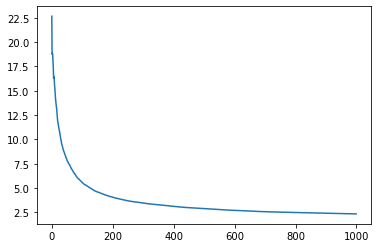

In [2]:
# regret calculation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

action_regrets = np.ones(4)*max_reward - pos_reward
print(action_regrets)

cum_regret = np.zeros((T,S))
for s in range(S):
    cum_regret[:,s] = np.cumsum(regret[:,s])
for t in range(T):
    cum_regret[t,:] /= (t+1)
plt.plot(np.mean(cum_regret, 1))

[ -5.  10.  -5.  10.  10.  10.  10.  10.  -5. -50.  -5.  10.  10.  -5.
  10.  10.  10.  -5.  10.  -5.  10.  -5.  10.  10.  10. -50.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10. -50.  10.  10.  -5.
  10.  10.  -5.  10. -50.  10.  10.  -5.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  -5.  10.  -5.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  -5.  -5.  10.  10.  10.  10.  10.
  10.  -5.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  -5.
  10.  10.  10.  10.  10.  -5.  10.  -5.  10.  10. -50.  10.  -5.  10.
  10.  10.  10.  10.  -5.  -5.  10.  -5.  10.  10.  -5.  10.  10.  10.
  10.  -5.  10.  10.  -5.  10. -50.  10.  10.  10.  10.  10.  10.  -5.
  10.  10.  10.  10.  -5.  10.  10.  10.  10.  10.  10.  10.  10.  -5.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  -5.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  -5.  10.  10.  10.  10.
  10.  10.  -5.  10.  10.  10.  10.  -5.  10.  10.  10.  10.  10.  -5.
  10. 

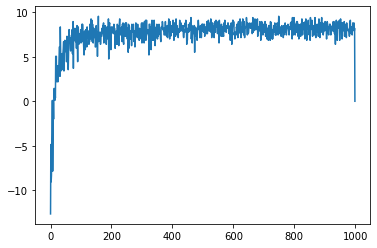

In [3]:
# obtained rewards plotting

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from random import choices
plt.plot(np.mean(rewards,1))

print(rewards[:,0])